In [61]:
import numpy as np
import pandas as pd
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
import numpy as np
from sklearn.model_selection import StratifiedKFold
from sklearn.decomposition import KernelPCA
from sklearn.decomposition import PCA
from sklearn.svm import SVC
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from matplotlib.colors import ListedColormap
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier   

In [62]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

# Load data into a pandas DataFrame
train_data = pd.read_csv('training.csv', index_col='id')

# Drop the 'split' column, which has no impact on the event
train_data.drop(columns=['split'], inplace=True)

# Invert the event values to give more weight to the minority class
train_data['event'] = train_data['event'].replace({0: 1, 1: 0})

# Extract the target column
train_target = train_data['event']

# Fill missing values with the mean
train_data.fillna(train_data.mean(), inplace=True)

#Prepare data use in ML algorithms
X = train_data.drop('event', axis=1).values
y = train_target.values

# Print out the percentage of samples that have the event
print('Default %:', train_target.sum() / train_target.shape[0] * 100)


Default %: 2.5255824080121925


In [63]:
import pandas as pd
from sklearn import preprocessing

# Load test data into a pandas DataFrame
test_data = pd.read_csv('test.csv', index_col='id')

# Drop the 'split' column, which has no impact on the event
test_data.drop(columns=['split'], inplace=True)

# Invert the event values to give more weight to the minority class
test_data['event'] = test_data['event'].replace({0: 1, 1: 0})

# Extract the target column
test_target = test_data['event']

# Fill missing values with the mean from the training data
test_data.fillna(train_data.mean(), inplace=True)

X_test = test_data.drop('event', axis=1).values
y_test = test_target.values

# Print out the percentage of samples that have the event
print('Default %:', test_target.sum() / test_target.shape[0] * 100)


Default %: 2.5004605670836892


In [64]:
import scorecardpy as sc
print(pd.__version__)

# Create woebin bins
bins = sc.woebin(train_data, y ="event", num_breaks=5, min_perc_fine=0.05, min_perc_coarse=0.1)

# Concatenate the bins into a single DataFrame
bins_df = pd.concat([pd.DataFrame(bins[var]) for var in bins])

1.1.3
[INFO] creating woe binning ...
Binning on 238836 rows and 9 columns in 00:00:15


In [65]:
bins_df


,variable,bin,count,count_distr,good,bad,badprob,woe,bin_iv,total_iv,breaks,is_special_values
0,var4,"[-inf,11.586977374755394)",12768,0.053459,11468,1300,0.101817,1.475922,2.453822e-01,0.398717,11.586977374755394,False
1,var4,"[11.586977374755394,12.0)",160649,0.672633,156587,4062,0.025285,0.001182,9.402225e-07,0.398717,12.0,False
2,var4,"[12.0,inf)",65419,0.273908,64749,670,0.010242,-0.917878,1.533336e-01,0.398717,inf,False
0,var2,"[-inf,500000.0)",50175,0.210081,48380,1795,0.035775,0.359037,3.222904e-02,0.220049,500000.0,False
1,var2,"[500000.0,1000000.0)",12392,0.051885,12172,220,0.017753,-0.360148,5.694719e-03,0.220049,1000000.0,False
2,var2,"[1000000.0,5500000.0)",33648,0.140883,33294,354,0.010521,-0.890717,7.511063e-02,0.220049,5500000.0,False
3,var2,"[5500000.0,6000000.0)",123073,0.515303,119523,3550,0.028845,0.136557,1.025840e-02,0.220049,6000000.0,False
4,var2,"[6000000.0,inf)",19548,0.081847,19435,113,0.005781,-1.494325,9.675577e-02,0.220049,inf,False
0,var3,"[-inf,inf)",238836,1.000000,232804,6032,0.025256,0.000000,0.000000e+00,0.000000,inf,False
0,var5,"[-inf,inf)",238836,1.000000,232804,6032,0.025256,0.000000,0.000000e+00,0.000000,inf,False


-------- 1/3 var1 --------
>>> dt[var1].describe(): 
count    238836.000000
mean          1.873951
std           2.799147
min           1.000000
25%           1.000000
50%           1.873951
75%           1.873951
max         121.000000
Name: var1, dtype: float64 



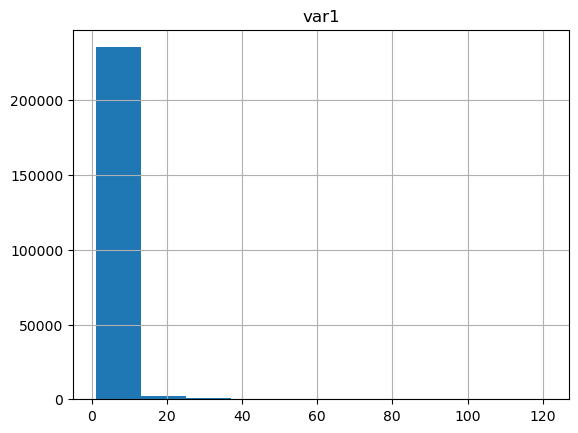

>>> Current breaks:
1.873951411647975,3.0 



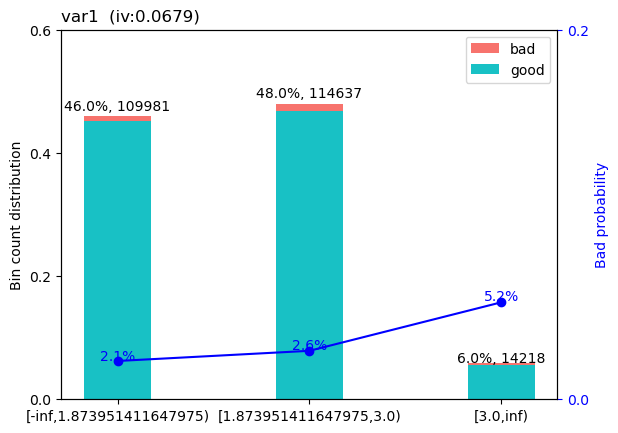

>>> Adjust breaks for (1/3) var1?
1: next 
2: yes 
3: back
Selection: 1
-------- 2/3 var2 --------
>>> dt[var2].describe(): 
count    2.388360e+05
mean     5.989773e+06
std      2.411050e+07
min      0.000000e+00
25%      8.594481e+05
50%      5.989773e+06
75%      5.989773e+06
max      2.817428e+09
Name: var2, dtype: float64 



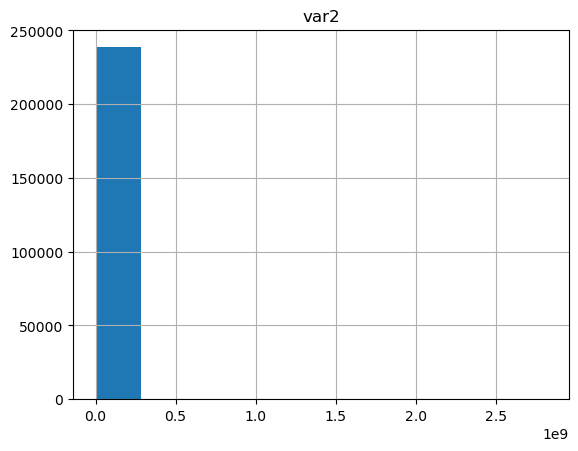

>>> Current breaks:
500000.0,1000000.0,5500000.0,6000000.0 



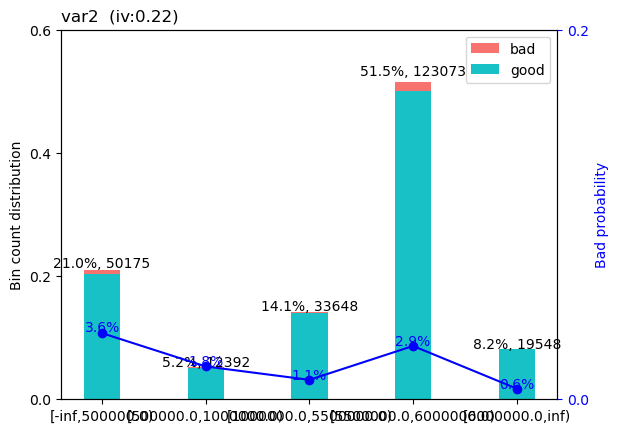

>>> Adjust breaks for (2/3) var2?
1: next 
2: yes 
3: back
Selection: 1
-------- 3/3 var4 --------
>>> dt[var4].describe(): 
count    238836.000000
mean         11.586977
std           1.979434
min           1.000000
25%          11.586977
50%          11.586977
75%          13.000000
max          13.000000
Name: var4, dtype: float64 



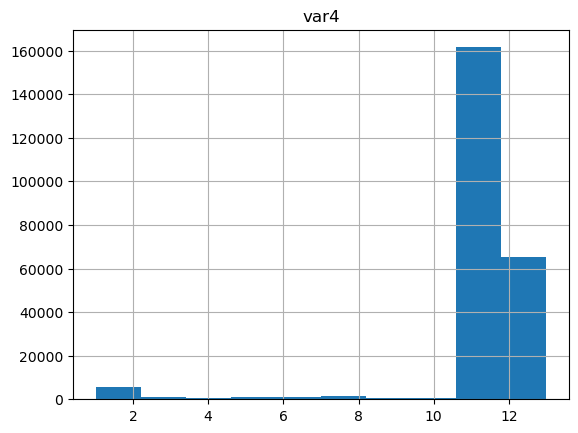

>>> Current breaks:
11.586977374755394,12.0 



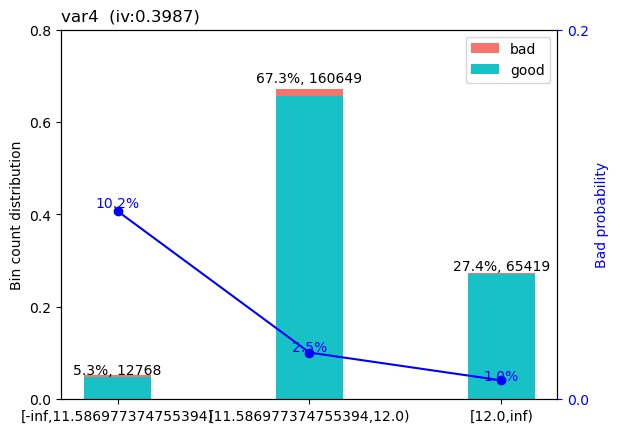

>>> Adjust breaks for (3/3) var4?
1: next 
2: yes 
3: back
Selection: 1
[INFO] creating woe binning ...
Binning on 238836 rows and 9 columns in 00:00:11


In [66]:
# binning adjustment - optimizing the binning results and improving the accuracy 
# adjust breaks interactively
breaks_adj = sc.woebin_adj(train_data, y="event", bins=bins) 
#or specify bin breaks manually
bins_adj = sc.woebin(train_data, y="event", breaks_list=breaks_adj)

Number of class 1 examples before: (6032, 8)
Number of class 1 examples after: (232804, 8)
(238836, 8)
(232804, 8)
(238836,)
(232804,)


(array([232804.,      0.,      0.,      0.,      0.,      0.,      0.,
             0.,      0., 232804.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <BarContainer object of 10 artists>)

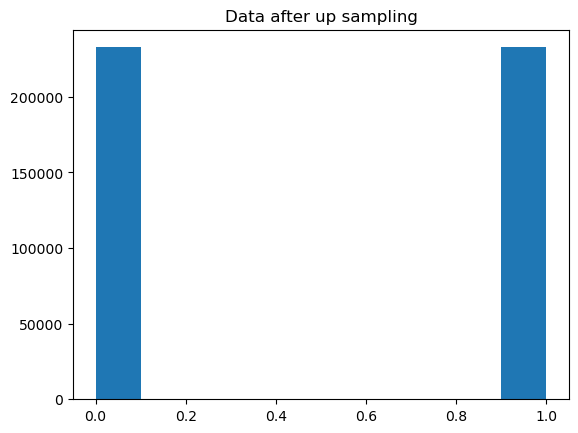

In [67]:
#Up-sampling - address class imbalance / prevent bias toward majority class
from sklearn.utils import resample



X_train=train_data.drop("event" ,axis= 1)
y_train=train_target

print('Number of class 1 examples before:', X_train[y_train == 1].shape)



X_upsampled, y_upsampled = resample(X_train[y_train == 1],
                                    y_train[y_train == 1],
                                    replace=True,
                                    n_samples=X_train[y_train == 0].shape[0],
                                    random_state=123)

print('Number of class 1 examples after:', X_upsampled.shape)
#print('Number of class 1 examples after:', y_upsampled.shape)

#UPSAMPLE


print(X_train.shape)
print(X_upsampled.shape)
print(y_train.shape)
print(y_upsampled.shape)

X_bal = np.vstack((X_train[y_train==0], X_upsampled))
y_bal = np.hstack((y_train[y_train==0], y_upsampled))

#check the data label balance
plt.title('Data after up sampling')
plt.hist(y_bal)

(465608, 8)
(59709, 8)
(465608,)
(59709,)


(array([232804.,      0.,      0.,      0.,      0.,      0.,      0.,
             0.,      0., 232804.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <BarContainer object of 10 artists>)

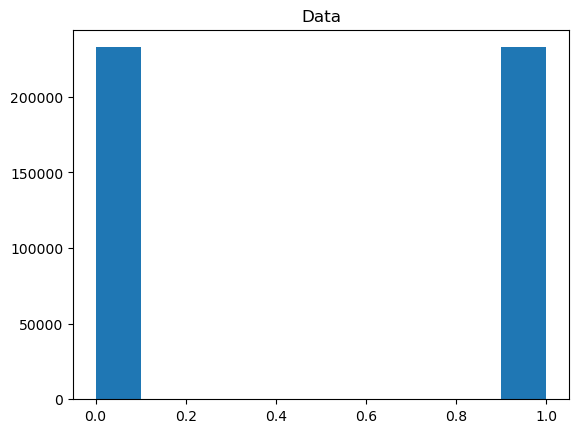

In [68]:
from sklearn.model_selection import train_test_split

X_train=X_bal
X_test
y_train=y_bal
y_test

print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

plt.title('Data')
plt.hist(y_train)

In [69]:
X_train=pd.DataFrame(X_train,columns=train_data.columns[1:])

In [70]:
# converting train and test into woe values
train_woe = sc.woebin_ply(X_train, bins)
test_woe = sc.woebin_ply(pd.DataFrame(X_test, columns=X_train.columns), bins)

X_train = train_woe
X_test = pd.DataFrame(test_woe, columns=X_train.columns)

# continue with the rest of your code


[INFO] converting into woe values ...
Woe transformating on 465608 rows and 8 columns in 00:00:14
[INFO] converting into woe values ...


In [71]:
#Logistic Regression
from itertools import combinations

def find_best_combination(X_train, X_test, y_train, y_test):
    best_accuracy = 0
    best_combination = []
    for i in range(1, len(X_train.columns)+1):
        for combination in combinations(X_train.columns, i):
            X_train_combination = X_train[list(combination)]
            X_test_combination = X_test[list(combination)]
            model = LogisticRegression()
            model.fit(X_train_combination, y_train)
            y_pred = model.predict(X_test_combination)
            accuracy = accuracy_score(y_test, y_pred)
            if accuracy > best_accuracy:
                best_accuracy = accuracy
                best_combination = list(combination)
    return best_accuracy, best_combination


In [72]:
best_accuracy, best_combination = find_best_combination(X_train, X_test, y_train, y_test)
print("Best combination of variables:", best_combination)
print("Accuracy:", best_accuracy)


Best combination of variables: ['var5_woe']
Accuracy: 0.9749953943291632


In [41]:
#Logistic regression grid search

pipe_lr = make_pipeline(LogisticRegression(random_state=1, solver='lbfgs'))

param_range = [.001, 0.01, 0.1, 1.0, 10.0, 100.0, 1000.0]

param_grid = [{'logisticregression__C': param_range}]

for i in X_train.columns:
    gs = GridSearchCV(estimator=pipe_lr, 
                      param_grid=param_grid, 
                      scoring='f1', 
                      refit=True,
                      cv=5,
                      n_jobs=-1)
    gs = gs.fit(pd.DataFrame(X_train[i]), y_train)
    print(i)
    print(gs.best_score_)
    print(gs.best_params_)

var5_woe
0.13333237877735699
{'logisticregression__C': 0.001}
var3_woe
0.13333237877735699
{'logisticregression__C': 0.001}
var7_woe
0.6514624546523451
{'logisticregression__C': 0.001}
var1_woe
0.5764657927484098
{'logisticregression__C': 0.001}
var2_woe
0.6795528575656811
{'logisticregression__C': 0.001}
var8_woe
0.6675519024410463
{'logisticregression__C': 0.001}
var4_woe
0.6128828931591146
{'logisticregression__C': 0.1}
var6_woe
0.13333237877735699
{'logisticregression__C': 0.001}


In [21]:
#Logistic regression grid search

listfeature=['var5_woe']

pipe_lr = make_pipeline(LogisticRegression(random_state=1, solver='lbfgs'))

param_range = [.001, 0.01, 0.1, 1.0, 10.0, 100.0, 1000.0]

param_grid = [{'logisticregression__C': param_range}]

gs = GridSearchCV(estimator=pipe_lr, 
                  param_grid=param_grid, 
                  scoring='f1', 
                  refit=True,
                  cv=5,
                  n_jobs=-1)
gs = gs.fit(X_train[listfeature], y_train)
print(gs.best_score_)
print(gs.best_params_)

0.2665929814865985
{'logisticregression__C': 0.001}


0.9749953943291632
              precision    recall  f1-score   support

           0     0.9750    1.0000    0.9873     58216
           1     0.0000    0.0000    0.0000      1493

    accuracy                         0.9750     59709
   macro avg     0.4875    0.5000    0.4937     59709
weighted avg     0.9506    0.9750    0.9627     59709



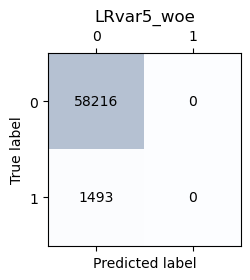

In [23]:
from sklearn.metrics import classification_report, confusion_matrix
import warnings
warnings.filterwarnings('ignore')


listfeature=['var5_woe']

clf = LogisticRegression(penalty='l2', 
                          C=1e-3,
                          solver='lbfgs',
                          random_state=1)

clf.fit(X_train[listfeature], y_train)

print(clf.score(X_test[listfeature],y_test))
print(classification_report(y_test, clf.predict(X_test[listfeature]),digits=4))

confmat = confusion_matrix(y_test, clf.predict(X_test[listfeature]))
#print(confmat)

fig, ax = plt.subplots(figsize=(2.5, 2.5))
ax.matshow(confmat, cmap=plt.cm.Blues, alpha=0.3)
for i in range(confmat.shape[0]):
    for j in range(confmat.shape[1]):
        ax.text(x=j, y=i, s=confmat[i, j], va='center', ha='center')

plt.xlabel('Predicted label')
plt.ylabel('True label')

plt.title('LR'+''.join(listfeature))

plt.show()

Logistic regression
              precision    recall  f1-score   support

           0     0.9907    0.3155    0.4786     58216
           1     0.0321    0.8848    0.0619      1493

    accuracy                         0.3297     59709
   macro avg     0.5114    0.6001    0.2702     59709
weighted avg     0.9668    0.3297    0.4681     59709



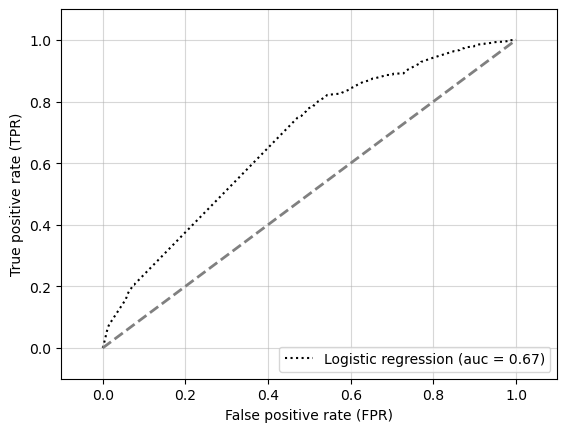

In [45]:
from sklearn.metrics import roc_curve
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import auc
import warnings
warnings.filterwarnings('ignore')
from sklearn.pipeline import Pipeline

clf = LogisticRegression(penalty='l2', 
                          C=1e-3,
                          solver='lbfgs',
                          random_state=1)

pipe = Pipeline([['clf', clf]])


clf_labels = ['Logistic regression']

all_clf = [pipe]


colors = ['black', 'orange', 'blue', 'green']
linestyles = [':', '--', '-.', '-']
for clf, label, clr, ls \
        in zip(all_clf,
               clf_labels, colors, linestyles):
    print(label)
    # assuming the label of the positive class is 1
    y_pred = clf.fit(X_train,y_train).predict_proba(X_test)[:, 1]
    fpr, tpr, thresholds = roc_curve(y_true=y_test,
                                     y_score=y_pred)
    roc_auc = auc(x=fpr, y=tpr)

    
    print(classification_report(y_test, clf.predict(X_test),digits=4))

    plt.plot(fpr, tpr,
         color=clr,
         linestyle=ls,
         label='%s (auc = %0.2f)' % (label, roc_auc))
    
    
plt.legend(loc='lower right')
plt.plot([0, 1], [0, 1],
         linestyle='--',
         color='gray',
         linewidth=2)

plt.xlim([-0.1, 1.1])
plt.ylim([-0.1, 1.1])
plt.grid(alpha=0.5)
plt.xlabel('False positive rate (FPR)')
plt.ylabel('True positive rate (TPR)')
plt.show()

Decision Tree

In [73]:
#Decision Tree
from itertools import combinations

def find_best_combination(X_train, X_test, y_train, y_test):
    best_accuracy = 0
    best_combination = []
    for i in range(1, len(X_train.columns)+1):
        for combination in combinations(X_train.columns, i):
            X_train_combination = X_train[list(combination)]
            X_test_combination = X_test[list(combination)]
            model = DecisionTreeClassifier()
            model.fit(X_train_combination, y_train)
            y_pred = model.predict(X_test_combination)
            accuracy = accuracy_score(y_test, y_pred)
            if accuracy > best_accuracy:
                best_accuracy = accuracy
                best_combination = list(combination)
    return best_accuracy, best_combination


In [74]:
best_accuracy, best_combination = find_best_combination(X_train, X_test, y_train, y_test)
print("Best combination of variables:", best_combination)
print("Accuracy:", best_accuracy)


Best combination of variables: ['var5_woe']
Accuracy: 0.9749953943291632


In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.pipeline import make_pipeline

pipe_dt = make_pipeline(DecisionTreeClassifier(random_state=1))

param_grid = {'decisiontreeclassifier__max_depth': [3, 4, 5, 6, 7, 8, 9, 10],
'decisiontreeclassifier__min_samples_split': [2, 3, 4, 5, 6, 7, 8, 9, 10],
'decisiontreeclassifier__min_samples_leaf': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]}

gs_dt = GridSearchCV(estimator=pipe_dt,
param_grid=param_grid,
scoring='accuracy',
refit=True,
cv=5,
n_jobs=-1)

gs_dt.fit(X_train, y_train)
print(gs_dt.best_score_)
print(gs_dt.best_params_)

0.9749953943291632
              precision    recall  f1-score   support

           0     0.9750    1.0000    0.9873     58216
           1     0.0000    0.0000    0.0000      1493

    accuracy                         0.9750     59709
   macro avg     0.4875    0.5000    0.4937     59709
weighted avg     0.9506    0.9750    0.9627     59709



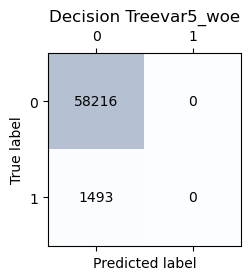

In [34]:
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.tree import DecisionTreeClassifier
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

listfeature=['var5_woe']

clf = DecisionTreeClassifier(max_depth=3, random_state=1)

clf.fit(X_train[listfeature], y_train)

print(clf.score(X_test[listfeature], y_test))
print(classification_report(y_test, clf.predict(X_test[listfeature]), digits=4))

confmat = confusion_matrix(y_test, clf.predict(X_test[listfeature]))

fig, ax = plt.subplots(figsize=(2.5, 2.5))
ax.matshow(confmat, cmap=plt.cm.Blues, alpha=0.3)
for i in range(confmat.shape[0]):
    for j in range(confmat.shape[1]):
        ax.text(x=j, y=i, s=confmat[i, j], va='center', ha='center')

plt.xlabel('Predicted label')
plt.ylabel('True label')

plt.title('Decision Tree' + ''.join(listfeature))

plt.show()


In [ ]:
from sklearn.metrics import roc_curve
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import auc
import warnings
warnings.filterwarnings('ignore')
from sklearn.pipeline import Pipeline

clf = DecisionTreeClassifier(criterion='gini', 
                                    max_depth=4, 
                                    random_state=1)

pipe = Pipeline([['clf', clf]])


clf_labels = ['Decision Tree']

all_clf = [pipe]


colors = ['black', 'orange', 'blue', 'green']
linestyles = [':', '--', '-.', '-']
for clf, label, clr, ls \
        in zip(all_clf,
               clf_labels, colors, linestyles):
    print(label)
    # assuming the label of the positive class is 1
    y_pred = clf.fit(X_train,y_train).predict_proba(X_test)[:, 1]
    fpr, tpr, thresholds = roc_curve(y_true=y_test,
                                     y_score=y_pred)
    roc_auc = auc(x=fpr, y=tpr)

    
    print(classification_report(y_test, clf.predict(X_test),digits=4))

    plt.plot(fpr, tpr,
         color=clr,
         linestyle=ls,
         label='%s (auc = %0.2f)' % (label, roc_auc))
    
    
plt.legend(loc='lower right')
plt.plot([0, 1], [0, 1],
         linestyle='--',
         color='gray',
         linewidth=2)

plt.xlim([-0.1, 1.1])
plt.ylim([-0.1, 1.1])
plt.grid(alpha=0.5)
plt.xlabel('False positive rate (FPR)')
plt.ylabel('True positive rate (TPR)')
plt.show()

Random Forest

In [75]:
#Random Forest
from itertools import combinations
from sklearn.ensemble import RandomForestClassifier

def find_best_combination(X_train, X_test, y_train, y_test):
    best_accuracy = 0
    best_combination = []
    for i in range(1, len(X_train.columns)+1):
        for combination in combinations(X_train.columns, i):
            X_train_combination = X_train[list(combination)]
            X_test_combination = X_test[list(combination)]
            model = RandomForestClassifier()
            model.fit(X_train_combination, y_train)
            y_pred = model.predict(X_test_combination)
            accuracy = accuracy_score(y_test, y_pred)
            if accuracy > best_accuracy:
                best_accuracy = accuracy
                best_combination = list(combination)
    return best_accuracy, best_combination


In [76]:
best_accuracy, best_combination = find_best_combination(X_train, X_test, y_train, y_test)
print("Best combination of variables:", best_combination)
print("Accuracy:", best_accuracy)


Best combination of variables: ['var5_woe']
Accuracy: 0.9749953943291632


0.7098427372757876
              precision    recall  f1-score   support

           0     0.9693    0.7254    0.8298     58216
           1     0.0097    0.1052    0.0178      1493

    accuracy                         0.7098     59709
   macro avg     0.4895    0.4153    0.4238     59709
weighted avg     0.9453    0.7098    0.8095     59709



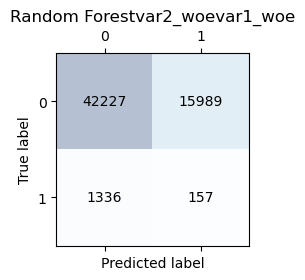

In [40]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

listfeature = ['var2_woe','var1_woe']

clf = RandomForestClassifier(n_estimators=100, max_depth=3, random_state=1)

clf.fit(X_train[listfeature], y_train)

print(clf.score(X_test[listfeature], y_test))
print(classification_report(y_test, clf.predict(X_test[listfeature]), digits=4))

confmat = confusion_matrix(y_test, clf.predict(X_test[listfeature]))

fig, ax = plt.subplots(figsize=(2.5, 2.5))
ax.matshow(confmat, cmap=plt.cm.Blues, alpha=0.3)
for i in range(confmat.shape[0]):
    for j in range(confmat.shape[1]):
        ax.text(x=j, y=i, s=confmat[i, j], va='center', ha='center')

plt.xlabel('Predicted label')
plt.ylabel('True label')

plt.title('Random Forest' + ''.join(listfeature))

plt.show()


In [ ]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, f1_score, roc_auc_score, roc_curve, auc

def train_and_evaluate_model(X_train, y_train, X_test, y_test, criterion='gini', max_depth=4, random_state=1):
    # Initialize a RandomForestClassifier model
    model = RandomForestClassifier(criterion=criterion, max_depth=max_depth, random_state=random_state)

    # Train the model on the training data
    model.fit(X_train, y_train)

    # Evaluate the model on the test data and print the accuracy score
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    print(f"Accuracy score: {accuracy:.4f}")

    # Print the classification report and calculate the f1 score
    report = classification_report(y_test, y_pred, digits=4)
    print(report)
    f1 = f1_score(y_test, y_pred)
    print(f"F1 score: {f1:.4f}")

    # Calculate the AUC-ROC and plot the ROC curve
    y_prob = model.predict_proba(X_test)[:, 1]
    auc_roc = roc_auc_score(y_test, y_prob)
    print(f"AUC-ROC score: {auc_roc:.4f}")
    fpr, tpr, thresholds = roc_curve(y_test, y_prob)
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, 'b', label='AUC = %0.2f' % roc_auc)
    plt.legend(loc='lower right')
    plt.title('Receiver Operating Characteristic')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.show()

    # Plot the confusion matrix
    confmat = confusion_matrix(y_test, y_pred)
    fig, ax = plt.subplots(figsize=(2.5, 2.5))
    ax.matshow(confmat, cmap=plt.cm.Blues, alpha=0.3)
    for i in range(confmat.shape[0]):
        for j in range(confmat.shape[1]):
            ax.text(x=j, y=i, s=confmat[i, j], va='center', ha='center')

    plt.xlabel('Predicted label')
    plt.ylabel('True label')
    plt.title('Random Forest Confusion Matrix')
    plt.show()
    
    # Return the model
    return model


In [ ]:
model = train_and_evaluate_model(X_train, y_train, X_test, y_test, criterion='gini', max_depth=4, random_state=1)


#Xgboost

In [42]:
import xgboost as xgb
from itertools import combinations
from sklearn.metrics import accuracy_score

def find_best_combination(X_train, X_test, y_train, y_test):
    best_accuracy = 0
    best_combination = []
    for i in range(1, len(X_train.columns)+1):
        for combination in combinations(X_train.columns, i):
            X_train_combination = X_train[list(combination)]
            X_test_combination = X_test[list(combination)]
            model = xgb.XGBClassifier()
            model.fit(X_train_combination, y_train)
            y_pred = model.predict(X_test_combination)
            accuracy = accuracy_score(y_test, y_pred)
            if accuracy > best_accuracy:
                best_accuracy = accuracy
                best_combination = list(combination)
    return best_accuracy, best_combination

best_accuracy, best_combination = find_best_combination(X_train, X_test, y_train, y_test)
print("Best combination of variables:", best_combination)
print("Accuracy:", best_accuracy)


Best combination of variables: ['var5_woe']
Accuracy: 0.9749953943291632


In [ ]:
import xgboost as xgb
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.model_selection import train_test_split, GridSearchCV

# Creating an XGBoost classifier
xgb_model = xgb.XGBClassifier(objective="binary:logistic", eval_metric="auc", use_label_encoder=False)

# Defining hyperparameters to tune
params = {
    "learning_rate": [0.001, 0.05, 0.1, 0.15],
    "max_depth": [1, 3, 5, 7],
    "n_estimators": [10, 100, 200, 300]
}

# Creating a Grid Search object
grid_search = GridSearchCV(estimator=xgb_model, param_grid=params, cv=5, n_jobs=-1)

# Fitting the Grid Search object to the training data
grid_search.fit(X_train, y_train)

# Getting the best hyperparameters
best_params = grid_search.best_params_
print("Best Hyperparameters: ", best_params)

# Creating an XGBoost classifier with the best hyperparameters
xgb_model = xgb.XGBClassifier(objective="binary:logistic", eval_metric="auc", use_label_encoder=False, **best_params)

# Training the model with the best hyperparameters
xgb_model.fit(X_train, y_train)

# Making predictions on the test data
y_pred = xgb_model.predict(X_test)

# Evaluating the model
accuracy = accuracy_score(y_test, y_pred)
confusion_mat = confusion_matrix(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

print("Accuracy: ", accuracy)
print("Confusion Matrix: \n", confusion_mat)
print("Classification Report: \n", classification_rep)


In [ ]:
import xgboost as xgb
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, f1_score, roc_auc_score, roc_curve, auc

def train_and_evaluate_model(X_train, y_train, X_test, y_test, max_depth=3, learning_rate=0.1, n_estimators=100, objective='binary:logistic'):
    # Initialize an XGBClassifier model
    model = xgb.XGBClassifier(max_depth=max_depth, learning_rate=learning_rate, n_estimators=n_estimators, objective=objective)

    # Train the model on the training data
    model.fit(X_train, y_train)

    # Evaluate the model on the test data and print the accuracy score
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    print(f"Accuracy score: {accuracy:.4f}")

    # Print the classification report and calculate the f1 score
    report = classification_report(y_test, y_pred, digits=4)
    print(report)
    f1 = f1_score(y_test, y_pred)
    print(f"F1 score: {f1:.4f}")

    # Calculate the AUC-ROC and plot the ROC curve
    y_prob = model.predict_proba(X_test)[:, 1]
    auc_roc = roc_auc_score(y_test, y_prob)
    print(f"AUC-ROC score: {auc_roc:.4f}")
    fpr, tpr, thresholds = roc_curve(y_test, y_prob)
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, 'b', label='AUC = %0.2f' % roc_auc)
    plt.legend(loc='lower right')
    plt.title('Receiver Operating Characteristic')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.show()

    # Plot the confusion matrix
    confmat = confusion_matrix(y_test, y_pred)
    fig, ax = plt.subplots(figsize=(2.5, 2.5))
    ax.matshow(confmat, cmap=plt.cm.Blues, alpha=0.3)
    for i in range(confmat.shape[0]):
        for j in range(confmat.shape[1]):
            ax.text(x=j, y=i, s=confmat[i, j], va='center', ha='center')

    plt.xlabel('Predicted label')
    plt.ylabel('True label')
    plt.title('XGBoost Confusion Matrix')
    plt.show()
    
    # Return the model
    return model


In [ ]:
model = train_and_evaluate_model(X_train, y_train, X_test, y_test, max_depth=3, learning_rate=0.1, n_estimators=100, objective='binary:logistic')
